<a href="https://colab.research.google.com/github/saurabhkale17/ml/blob/main/build_neural_network_from_scratch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

Heart attack prediction: Dataset source: https://www.kaggle.com/datasets/rashikrahmanpritom/heart-attack-analysis-prediction-dataset?resource=download

In [2]:
df = pd.read_csv('heart.csv')
print(df.head())

   age  sex  cp  trtbps  chol  fbs  restecg  thalachh  exng  oldpeak  slp  \
0   63    1   3     145   233    1        0       150     0      2.3    0   
1   37    1   2     130   250    0        1       187     0      3.5    0   
2   41    0   1     130   204    0        0       172     0      1.4    2   
3   56    1   1     120   236    0        1       178     0      0.8    2   
4   57    0   0     120   354    0        1       163     1      0.6    2   

   caa  thall  output  
0    0      1       1  
1    0      2       1  
2    0      2       1  
3    0      2       1  
4    0      2       1  


Seperate X and y pairs from the original dataset

In [3]:
X = np.array(df.loc[:, df.columns != 'output'])
y = np.array(df['output'])

print("X shape : ", X.shape)
print("y shape : ", y.shape)

X shape :  (303, 13)
y shape :  (303,)


Train test split using sklearn

In [4]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123)

Preprocessing: Feature standardization


*   Subtract by mean
*   Variance of 1



In [5]:
scaler = StandardScaler()
X_train_scale = scaler.fit_transform(X_train)
X_test_scale = scaler.transform(X_test)

print(X_train_scale.shape)
print(X_test_scale.shape)

# print(X_train_scale)

(242, 13)
(61, 13)


# Develop DL model

In [6]:
class NeuralNetworkFromScratch:
    def __init__(self, LR, X_train, y_train, X_test, y_test):
        self.w = np.random.randn(X_train.shape[1])
        self.b = np.random.randn()
        self.LR = LR
        self.X_train = X_train
        self.y_train = y_train
        self.X_test = X_test
        self.y_test = y_test
        self.L_train = []
        self.L_test = []

    def activation(self, x):
        # sigmoid in our case
        return 1 / (1 + np.exp(-x))

    def dactivation(self, x):
        # derivative of sigmoid
        return self.activation(x) * (1 - self.activation(x))

    def forward(self, X):
        hidden_1 = np.dot(X, self.w) + self.b
        activate_1 = self.activation(hidden_1)
        return activate_1

    def backward(self, X, y_true):
        # calc gradients
        hidden_1 = np.dot(X, self.w) + self.b
        y_pred = self.forward(X)
        dL_dpred = 2 * (y_pred - y_true)
        dpred_dhidden1 = self.dactivation(hidden_1)
        dhidden1_db = 1
        dhidden1_dw = X

        dL_db = dL_dpred * dpred_dhidden1 * dhidden1_db
        dL_dw = dL_dpred * dpred_dhidden1 * dhidden1_dw
        return dL_db, dL_dw

    def optimizer(self, dL_db, dL_dw):
        # update weights
        self.b = self.b - dL_db * self.LR
        self.w = self.w - dL_dw * self.LR

    def train(self, ITERATIONS):
        for i in range(ITERATIONS):
            # random position
            random_pos = np.random.randint(len(self.X_train))

            # forward pass
            y_train_true = self.y_train[random_pos]
            y_train_pred = self.forward(self.X_train[random_pos])

            # calc training loss
            L = np.sum(np.square(y_train_pred - y_train_true))
            self.L_train.append(L)

            # calc gradients
            dL_db, dL_dw = self.backward(
                self.X_train[random_pos], self.y_train[random_pos]
            )
            # update weights
            self.optimizer(dL_db, dL_dw)

            # calc error at every epoch end
            L_sum = 0
            for j in range(len(self.X_test)):
                y_true = self.y_test[j]
                y_pred = self.forward(self.X_test[j])
                L_sum += np.square(y_pred - y_true)
            self.L_test.append(L_sum)

        return "training successfully finished"

Setup Hyperparameters

In [7]:
LR = 0.1
num_iter = 1000

Instantiate nn model class object

In [8]:
nn = NeuralNetworkFromScratch(LR, X_train_scale, y_train, X_test_scale, y_test)

nn.train(num_iter)


'training successfully finished'

Model performance vizualization

<Axes: >

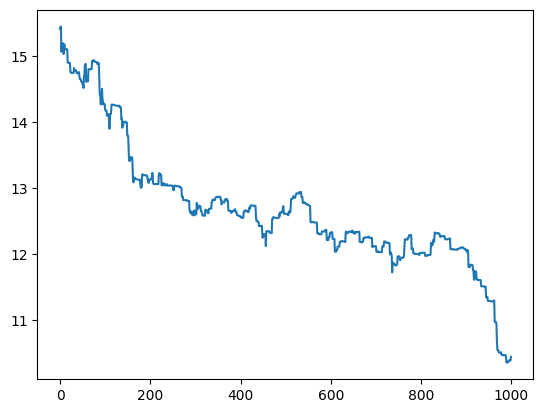

In [9]:
sns.lineplot(x = list(range(len(nn.L_test))), y = nn.L_test)

Performance on test data

In [10]:
total = X_test_scale.shape[0]
correct = 0

y_preds = []

for i in range(total):
  y_true = y_test[i]
  y_pred = np.round(nn.forward(X_test_scale[i]))
  y_preds.append(y_pred)

  correct += y_true == y_pred

print("Accuracy: ", correct / total)

Accuracy:  0.7868852459016393


Confusion matrix

In [11]:
confusion_matrix(y_test, y_preds)

array([[23,  7],
       [ 6, 25]])